# Table of contents <a id='back'></a>

* [1.Iniciação, carregamento, otimização e exploração de dados](#inicio)
* [2.Priorizando Hipóteses](#hipoteses)
* [3.Análise de teste A/B](#analise)
    * [3.1.Receita acumulada por grupo](#receita)
    * [3.2.Tamanho médio acumulado do pedido por grupo](#medio)
    * [3.3. Diferença relativa no tamanho médio acumulado do pedido entre os grupos](#diferenca)
    * [3.4. Taxa de conversão de cada grupo](#conversao)
    * [3.5. Gráfico diferença relativa](#relativa)
    * [3.6. Dispersão do número de pedidos por usuário](#numero)
    * [3.7. Percentis 95 e 99 para o número de pedidos por usuário](#percentilpedido)
    * [3.8. Dispersão dos preços dos pedidos](#preco) 
    * [3.9. Percentis dos preços dos pedidos](#percentilpreco)
    * [3.10 Diferença na conversão entre os grupos usando dados brutos](#dadosbrutos1)
    * [3.11. Diferença no tamanho médio do pedido entre os grupos usando os dados brutos](#dadosbrutos2)
    * [3.12. Diferença na conversão entre os grupos usando os dados filtrados](#dadosfiltrados1)
    * [3.13. Diferença no tamanho médio do pedido entre os grupos usando os dados filtrados](#dadosfiltrados)
    * [3.14. Decisões sobre o teste](#decisao)
* [4. Conclusão](#conclusao)
    
    
    


# Estratégias para Maximizar a Receita da Loja Online

Como analista em uma grande loja online, estamos encarregados de ajudar o departamento de marketing a aumentar a receita da loja online da empresa. Após uma análise detalhada dos dados e juntamente com o departamento de marketing, foi compilada uma lista de hipóteses que podem ajudar a alcançar esse objetivo. 

Assim sendo, o presente estudo tem como escopo utilizar a referida lista para entao priorizar essas hipóteses e tambem testá-las para ver qual delas tem o maior impacto na receita.

Para isso, iremos primeiramente priorizar hipoteses e apos iremos testar e analisar os testes A/B.


# 1. Iniciação, carregamento, otimização e exploração de dados <a id='inicio'></a>

Carregaremos as bibliotecas e carregaremos os dados sobre as hipóteses, pedidos e visitas. Verificaremos se há valores ausentes e/ou duplicados. Também iremos checar se o tipo de dados nos dataframes está correto e se há alguma observação na escrita.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import datetime as dt
import scipy.stats as stats

In [21]:
#path='/datasets/'
path = 'C://Users//tha_s//Downloads//'
hipoteses = pd.read_csv(path + 'hypotheses_us.csv', sep=';')
print(hipoteses)

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   
5  Add a customer review page. This will increase...      3       2   
6  Show banners with current offers and sales on ...      5       3   
7  Add a subscription form to all the main pages....     10       7   
8  Launch a promotion that gives users discounts ...      1       9   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  
5           2       3  
6           8       3  
7           8       5  
8           9       5  


In [22]:
#path='/datasets/'
path = 'C://Users//tha_s//Downloads//'
orders = pd.read_csv(path + 'orders_us.csv')
print(orders)


      transactionId   visitorId        date  revenue group
0        3667963787  3312258926  2019-08-15     30.4     B
1        2804400009  3642806036  2019-08-15     15.2     B
2        2961555356  4069496402  2019-08-15     10.2     A
3        3797467345  1196621759  2019-08-15    155.1     B
4        2282983706  2322279887  2019-08-15     40.5     B
...             ...         ...         ...      ...   ...
1192     2662137336  3733762160  2019-08-14    100.8     B
1193     2203539145   370388673  2019-08-14     50.1     A
1194     1807773912   573423106  2019-08-14    165.3     A
1195     1947021204  1614305549  2019-08-14      5.5     A
1196     3936777065  2108080724  2019-08-15   3120.1     B

[1197 rows x 5 columns]


In [23]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [24]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [25]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [26]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [27]:
if orders.duplicated().any():
    print("Existem dados duplicados no dataframe.")
else:
    print("Nao ha dados duplicados no dataframe.")

Nao ha dados duplicados no dataframe.


In [28]:
if orders.isnull().values.any():
    print("Existem valores ausentes no dataframe.")
else:
    print("Nao ha valores ausentes no dataframe.")

Nao ha valores ausentes no dataframe.


In [29]:
#path='/datasets/'
path = 'C://Users//tha_s//Downloads//'
visits = pd.read_csv(path + 'visits_us.csv')
print(visits)


          date group  visits
0   2019-08-01     A     719
1   2019-08-02     A     619
2   2019-08-03     A     507
3   2019-08-04     A     717
4   2019-08-05     A     756
..         ...   ...     ...
57  2019-08-27     B     720
58  2019-08-28     B     654
59  2019-08-29     B     531
60  2019-08-30     B     490
61  2019-08-31     B     718

[62 rows x 3 columns]


In [30]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [31]:
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [32]:
if visits.isnull().values.any():
    print("Existem valores ausentes no dataframe.")
else:
    print("Nao ha valores ausentes no dataframe.")

Nao ha valores ausentes no dataframe.


Nesse primeiro estágio do projeto, carregamos os dados dos conjuntos de dados e verificamos que não há dados ausentes ou duplicados.

No dataframe hipoteses, não houve qualquer mudança, pois não havia nada que precisasse de correção ou mudança. Já nos demais dataframes, as colunas date constavam em ambos como tipo de dado objeto e corrigimos para que constassem como date. No dataframe orders, também corrigimos a grafia das colunas 'transaction_id' e 'visitor_id'.

# 2. Priorizando Hipóteses <a id='hipoteses'></a>

Para aumentar a receita de uma loja online com Reach, Impact, Confidence e Effort especificados para cada um, iremos verificar o arquivo hypotheses e observar as hipóteses que o mesmo contém.

Iremos aplicar o framework ICE para priorizar hipóteses e classificaremos em ordem decrescente de prioridade. Também aplicaremos o framework RICE para priorizar hipóteses e classificaremos em ordem decrescente de prioridade.

Por fim, mostraremos como a priorização de hipóteses muda.

In [33]:
hipoteses['ICE'] = (hipoteses['Impact'] * hipoteses['Confidence']) / hipoteses['Effort']
print(hipoteses[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


In [34]:
hipoteses['RICE'] = (hipoteses['Reach']*hipoteses['Impact']*hipoteses['Confidence']) / hipoteses['Effort']
print(hipoteses[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


Após aplicar o framework ICE para priorizar hipóteses e também aplicar o framework RICE para priorizar hipóteses e comparar os resultados, verificamos como a priorização de hipóteses muda.

Quando do Impacto, Confiança e Esforço (ICE), verificamos que as três principais hipóteses foram 8, 0 e 7, e já quando do Alcance, Impacto, Confiança e Esforço (RICE), as três primeiras hipóteses foram 7, 2 e 0.

Vimos que as hipóteses 0 e 7 estão presentes em ambos os frameworks, porém não ocupam a mesma posição, e as hipóteses 8 e 2 não estão presentes em ambos os frameworks.

Nota-se que a hipótese 7 em RICE ficou em primeiro lugar, isso porque o parâmetro Alcance foi de 10, enquanto as demais possuem valor menor do que o da referida hipótese.

Por fim, entendemos que a melhor escolha seria usar o modelo RICE em vez do modelo ICE, tendo em vista que estamos priorizando hipóteses que mudam para refletir o potencial em um público maior, em vez de avaliarmos apenas o impacto, confiança e facilidade.

[Voltar ao Indice](#back)

# 3. Análise de teste A/B <a id='analise'></a>

Com as hipóteses priorizadas, lançaremos um teste A/B para testar a hipótese selecionada. Isso envolve dividir aleatoriamente os visitantes do site em dois grupos: um grupo de controle e um grupo de teste. O grupo de controle não verá nenhuma mudança, enquanto o grupo de teste verá a implementação da hipótese.

Porém, antes de começarmos os testes e análises, iremos remover os usuários que pertencem aos dois grupos - A e B - para que não haja interferência nos resultados dos testes.

Para isso, iremos identificar a quantidade de grupos por usuário e depois identificaremos os usuários que estão em mais de um grupo. Por fim, removeremos do dataframe os pedidos de usuários que estão em nossos dois grupos.

In [35]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [36]:
group_by_users = orders.groupby('visitor_id').agg({'group':'nunique'}).sort_values(by='group', ascending=False).reset_index()
groups.head()

NameError: name 'groups' is not defined

In [37]:
both_groups_users = group_by_users[group_by_users['group'] >1]['visitor_id']
both_groups_users.head()

0    2654030115
1    3891541246
2    3941795274
3    1404934699
4     351125977
Name: visitor_id, dtype: int64

In [38]:
orders = orders[~orders['visitor_id'].isin(both_groups_users)]
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1016 non-null   int64         
 1   visitor_id      1016 non-null   int64         
 2   date            1016 non-null   datetime64[ns]
 3   revenue         1016 non-null   float64       
 4   group           1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB


Agora, com o dataframe sem usuários que estão nos grupos, iniciaremos os testes e análises.

[Voltar ao Indice](#back)

### 3.1. Receita acumulada por grupo <a id='receita'></a>

Iremos realizar o teste por receita acumulada por grupo e para isso iremos seguir os seguinte passos: 

- criaremos um dataframe com pares de 'date' unívocos e os valores de 'group' da tabela orders e também eliminaremos os valores duplicados; 

- criaremos uma variável para armazenar a data, o grupo do teste A/B e quantidade de pedidos distintos do grupo teste para a data especificada; 

- criaremos também uma variável para armazenar a data, o grupo do teste A/B e a quantidade de visitantes distintos no grupo teste até a data especificada

- definiremos a uma nova variável fundindo as duas outras variáveis. 

- com a nova essa nova variável iremos criar uma variável para cada um dos grupos, onde iremos armazenar os dados relativos a datas, receita e quantidade de pedidos para ambos. 

Por fim, para melhor análise faremos os gráficos referente a receita acumulada pelo grupo A e B. 

In [39]:
orders_dup = orders[['date','group']].drop_duplicates()
orders_dup.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [40]:
orders_agregad = orders_dup.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : pd.Series.nunique, 'visitor_id' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
orders_agregad

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,3734.9
173,2019-08-02,B,40,39,3535.3
291,2019-08-03,A,66,60,5550.1
...,...,...,...,...,...
533,2019-08-29,B,510,490,74576.7
757,2019-08-30,A,460,437,52363.7
690,2019-08-30,B,531,511,77863.5
958,2019-08-31,A,468,445,53212.0


In [41]:
visits_agregad = orders_dup.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [42]:
acumulada_data = pd.merge(orders_agregad, visits_agregad, left_on=['date', 'group'], right_on=['date', 'group'])
acumulada_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']
acumulada_data.head()

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


In [43]:
receita_a = acumulada_data[acumulada_data['group']=='A'][['date','revenue', 'orders']]
receita_a.head()

,date,revenue,orders
0,2019-08-01,2266.6,23
2,2019-08-02,3734.9,42
4,2019-08-03,5550.1,66
6,2019-08-04,6225.6,77
8,2019-08-05,7623.6,99


In [44]:
receita_b = acumulada_data[acumulada_data['group']=='B'][['date','revenue', 'orders']]
receita_b.head()

,date,revenue,orders
1,2019-08-01,967.2,17
3,2019-08-02,3535.3,40
5,2019-08-03,4606.9,54
7,2019-08-04,6138.5,68
9,2019-08-05,7587.8,89


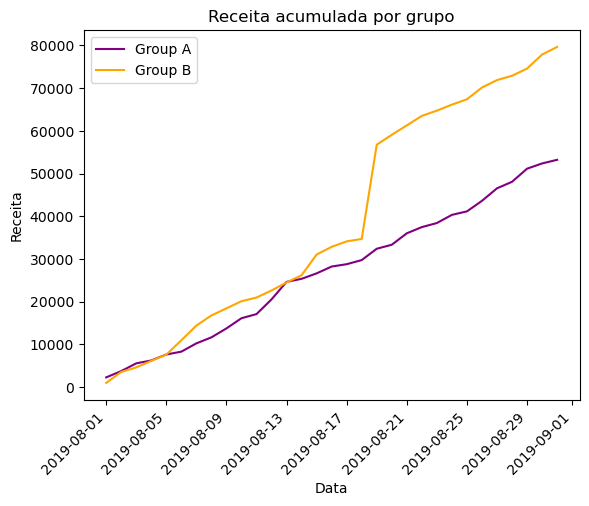

In [45]:
plt.plot(receita_a['date'], receita_a['revenue'], label='Group A', color='purple')
plt.plot(receita_b['date'], receita_b['revenue'], label='Group B', color='orange')

plt.legend() 
plt.xticks(rotation=45, ha='right') 
plt.xlabel('Data')
plt.ylabel('Receita')
plt.title('Receita acumulada por grupo')
plt.show()

Observando o gráfico, verificamos que, de início, ambos os grupos possuíam um crescimento praticamente igual. Havia um crescimento estável quando, após ambos estarem no mesmo ponto, o grupo B assumiu a liderança e se manteve à frente até a data final.

Apesar do resultado parecer indicar que o grupo B seria o vencedor, esse pico pode sugerir a presença de pedidos muito caros na amostra, o que poderia afetar o resultado final. Portanto, ainda não tomaremos isso como resultado final e seguiremos com os testes e estudos.

[Voltar ao Indice](#back)

### 3.2. Tamanho médio acumulado do pedido por grupo <a id='medio'></a>

Passaremos a analisar o tamanho médio acumulado do pedido por grupo e para isso iremos dividir a receita cumulativa pela quantidade cumulativa de pedidos utilizando as variáveis receita_ e receita_b. Para melhor análise construiremos um gráfico. 

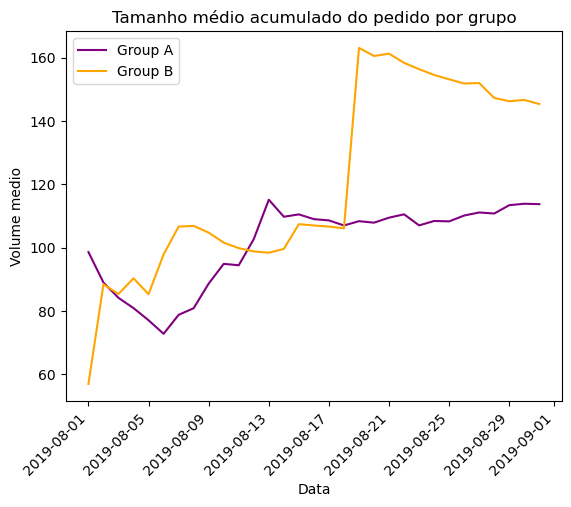

In [46]:
plt.plot(receita_a['date'], receita_a['revenue']/receita_a['orders'], label='Group A', color='purple')
plt.plot(receita_b['date'], receita_b['revenue']/receita_b['orders'], label='Group B', color='orange')

plt.legend() 
plt.xticks(rotation=45, ha='right') 
plt.xlabel('Data')
plt.ylabel('Volume medio')
plt.title('Tamanho médio acumulado do pedido por grupo')
plt.show()

Visualizando o gráfico acima, vemos que o valor cumulativo dos volumes médios de compra ainda apresenta flutuações em ambos os grupos. Nota-se que, quando um grupo estava liderando, o outro estava com valores mais abaixo, e por três vezes os grupos tiveram pontos de encontro. Até a metade do teste, houve oscilações na liderança, e após isso, houve um grande crescimento, com o grupo B liderando até o final do teste.

Mais uma vez, acreditamos que esse pico do grupo B pode ser decorrente da presença de pedidos volumosos e caros, e não podemos tirar conclusões ainda, tendo em vista que há dados atípicos que estão distorcendo o resultado.

[Voltar ao Indice](#back)

### 3.3. Diferença relativa no tamanho médio acumulado do pedido entre os grupos <a id='diferenca'></a>

Analisaremos agora a diferença relativa no tamanho médio acumulado do pedido entre os grupos. Para essa análise seguiremos os seguintes passos: 

- fundiremos as tabelas receita_a e receita_b para que tenha as colunas com a data, receita e ordens de cada grupo. 

- faremos um gráfico com a diferença entre o volume médio de compra cumulativo do grupo B comparado com o do grupo A. 

Também no grafico iremos acrescentar um eixo horizontal, ou seja, linha horizontal através do eixo, para que possamos ver os pontos onde a diferença entre os segmentos apresenta picos.

In [47]:
receita_cumulativa = pd.merge(receita_a, receita_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
receita_cumulativa.columns = ['date', 'revenue_A', 'orders_A', 'revenue_B', 'orders_B']
receita_cumulativa.head()

,date,revenue_A,orders_A,revenue_B,orders_B
0,2019-08-01,2266.6,23,967.2,17
1,2019-08-02,3734.9,42,3535.3,40
2,2019-08-03,5550.1,66,4606.9,54
3,2019-08-04,6225.6,77,6138.5,68
4,2019-08-05,7623.6,99,7587.8,89


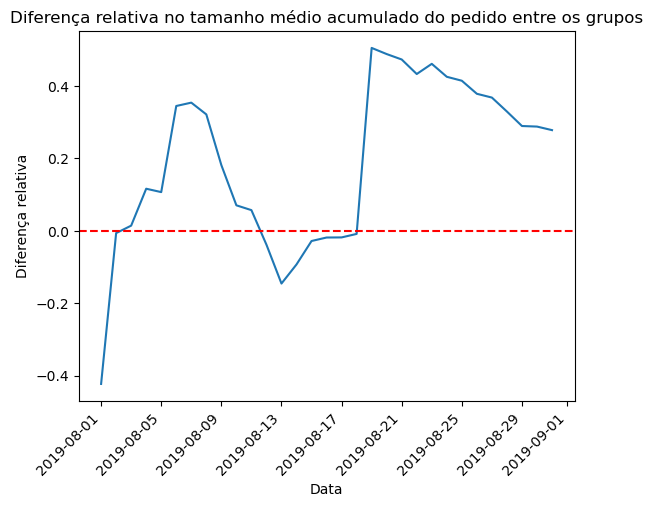

In [48]:
plt.plot(receita_cumulativa['date'], (receita_cumulativa['revenue_B']/receita_cumulativa['orders_B'])/(receita_cumulativa['revenue_A']/receita_cumulativa['orders_A'])-1)

plt.axhline(y=0, color='red', linestyle='--') 
plt.xticks(rotation=45, ha='right') 
plt.xlabel('Data')
plt.ylabel('Diferença relativa')
plt.title('Diferença relativa no tamanho médio acumulado do pedido entre os grupos')
plt.show()


Verificando o gráfico e a linha horizontal que foi criada, concluímos que durante o teste houve pontos onde a diferença entre os segmentos apresentou picos.

Entendemos que esses picos devem ter ocorrido devido à existência de pedidos grandes e valores atípicos.

[Voltar ao Indice](#back)

### 3.4. Taxa de conversão de cada grupo <a id='conversao'></a>

Iremos analisar a taxa de conversão de cada grupo como a proporção de pedidos para o número de visitas para cada dia. Para essa análise seguiremos os seguintes passos: 

- adicionaremos a tabela acumulada_data uma coluna onde tera a razão entre a quantidade de pedidos e a quantidade de usuários para um grupo específico em uma data específica;

- armazenaremos os dados relativos a pedidos nos segmentos A e B em uma variável para cada grupo. 

Com as variáveis criadas iremos construir um gráfico para vermos a conversão diária cumulativa para cada grupo e utilizaremos  intervalo de 2019-03-10 a 2019-04-23 e definiremos o eixo y para mostrar valores no intervalo de 0 a 0,05.

In [49]:
acumulada_data['conversion'] = acumulada_data['orders']/acumulada_data['visits']
acumulada_data.head()

,date,group,orders,buyers,revenue,visits,conversion
0,2019-08-01,A,23,19,2266.6,719,0.031989
1,2019-08-01,B,17,17,967.2,713,0.023843
2,2019-08-02,A,42,36,3734.9,1338,0.031390
3,2019-08-02,B,40,39,3535.3,1294,0.030912
4,2019-08-03,A,66,60,5550.1,1845,0.035772


In [50]:
acumulada_data_a = acumulada_data[acumulada_data['group']=='A']
acumulada_data_a.head()

,date,group,orders,buyers,revenue,visits,conversion
0,2019-08-01,A,23,19,2266.6,719,0.031989
2,2019-08-02,A,42,36,3734.9,1338,0.031390
4,2019-08-03,A,66,60,5550.1,1845,0.035772
6,2019-08-04,A,77,71,6225.6,2562,0.030055
8,2019-08-05,A,99,92,7623.6,3318,0.029837


In [51]:
acumulada_data_b = acumulada_data[acumulada_data['group']=='B']
acumulada_data_b.head()

,date,group,orders,buyers,revenue,visits,conversion
1,2019-08-01,B,17,17,967.2,713,0.023843
3,2019-08-02,B,40,39,3535.3,1294,0.030912
5,2019-08-03,B,54,53,4606.9,1803,0.029950
7,2019-08-04,B,68,66,6138.5,2573,0.026428
9,2019-08-05,B,89,87,7587.8,3280,0.027134


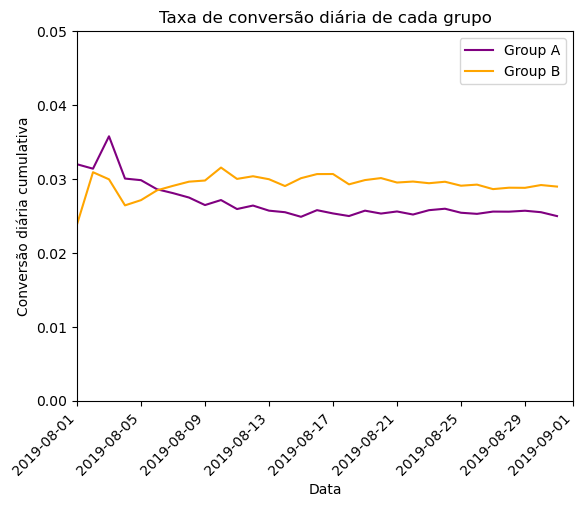

In [52]:
plt.plot(acumulada_data_a['date'], acumulada_data_a['conversion'], label='Group A', color='purple')
plt.plot(acumulada_data_b['date'], acumulada_data_b['conversion'], label='Group B', color='orange')

plt.legend()
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-09-01'), 0, 0.05])
plt.xticks(rotation=45, ha='right') 
plt.xlabel('Data')
plt.ylabel('Conversão diária cumulativa')
plt.title('Taxa de conversão diária de cada grupo')
plt.show()

O teste se iniciou com o grupo A tendo uma conversão maior, porém a taxa do grupo B subiu e ao longo do teste se estabilizou. Assim, a taxa de conversão do grupo A caiu, mas também se estabilizou.

[Voltar ao Indice](#back)

### 3.5 Gráfico diferença relativa <a id='relativa'></a>

Para melhor análise da diferença relativa, iremos construir um gráfico. Porém, primeiramente fundiremos as tabelas acumulada_data_a e acumulada_data_b para que assim tenhamos uma tabela com as colunas data e a conversão de ambos os grupos.

Com a nova tabela criada, o gráfico será feito com a diferença relativa entre a taxa de conversão cumulativa do grupo B comparada com o grupo A, utilizando o intervalo de 2019-03-10 a 2019-04-23 e definiremos o eixo y para mostrar valores no intervalo de -0,5 a 0,5.

Também no gráfico iremos acrescentar dois eixos horizontais para que possamos ver os pontos onde a diferença entre os segmentos apresenta picos.

In [53]:
conversions_merge = pd.merge(acumulada_data_a[['date','conversion']], acumulada_data_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
conversions_merge.columns = ['date', 'conversion_A', 'conversion_B']
conversions_merge.head()

,date,conversion_A,conversion_B
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134


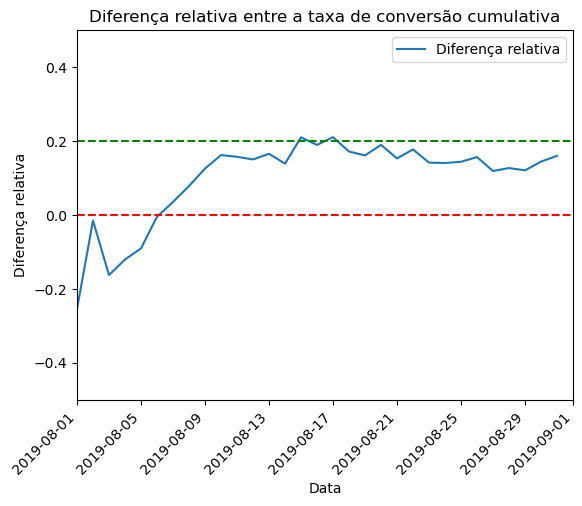

In [54]:
plt.plot(conversions_merge['date'], conversions_merge['conversion_B']/conversions_merge['conversion_A']-1, label='Diferença relativa')

plt.legend()
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=0.2, color='green', linestyle='--')
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-09-01'), -0.5, 0.5])
plt.xticks(rotation=45, ha='right') 
plt.xlabel('Data')
plt.ylabel('Diferença relativa')
plt.title('Diferença relativa entre a taxa de conversão cumulativa')
plt.show()

No gráfico, vemos que o grupo B iniciou o teste com uma taxa de conversão menor, porém, ao longo do teste, conquistou a liderança, chegando a um crescimento de pouco mais de 20% acima do grupo A. Nota-se que, logo depois que o grupo B assumiu a liderança, a conversão diminuiu, mas até o fim do teste ela se mostrou em crescimento gradual.

[Voltar ao Indice](#back)

### 3.6. Dispersão do número de pedidos por usuário  <a id='numero'></a>

Identificamos picos nas análises anteriores que devem ter ocorrido devido à existência de pedidos grandes e valores atípicos. Assim, para seguir nosso teste, iremos primeiramente criar um gráfico para verificar a distribuição da quantidade de pedidos por usuário.

Para fazermos o gráfico, criaremos um novo DataFrame que tenha as colunas 'visitor_id' e 'orders' e o analisaremos.

In [55]:
orders_users = (orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique}))
orders_users.columns = ['user_id', 'orders']
print(orders_users.sort_values(by='orders', ascending=False).head(10))

        user_id  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


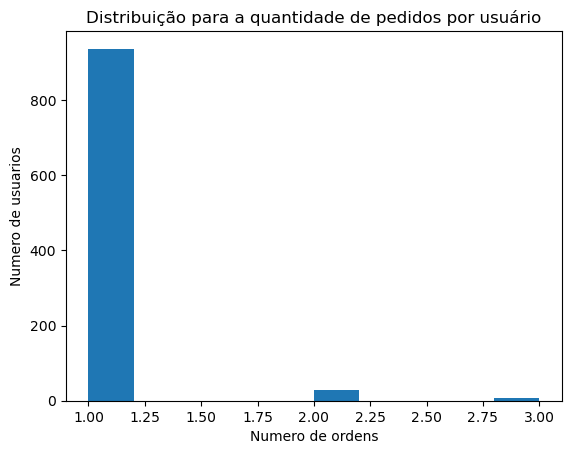

In [56]:
plt.hist(orders_users['orders'])
plt.title('Distribuição para a quantidade de pedidos por usuário')
plt.xlabel('Numero de ordens')
plt.ylabel('Numero de usuarios')
plt.show()

Observando o gráfico acima verificamos que a maioria dos clientes realizaram apenas um pedido. Porém, uma parcela significante efetuou de dois a quatro pedidos cada e poucos realizaram de 6 a 11 pedidos.

Para melhor análise iremos agora construir um gráfico de dispersão com a quantidade de pedidos por usuário. 

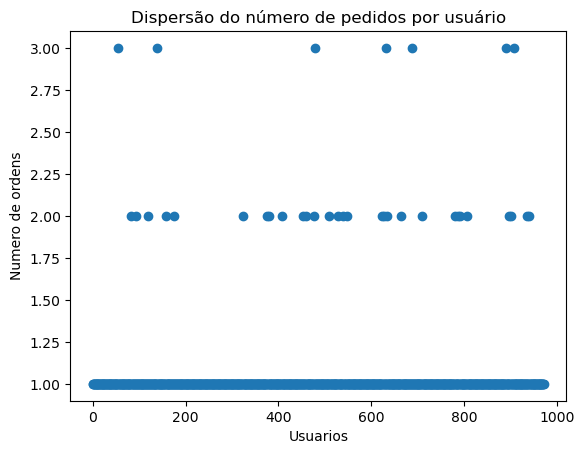

In [57]:
x_values = pd.Series(range(0, len(orders_users)))
plt.scatter(x_values, orders_users['orders']) 
plt.title('Dispersão do número de pedidos por usuário')
plt.xlabel('Usuarios')
plt.ylabel('Numero de ordens')
plt.show()

Com o gráfico de dispersão pudemos verificar que a grande maioria dos usuários realizaram de um a dois pedidos. Acreditamos que há anomalias nos dados tendo em vista que não há registro de usuários com mais de dois pedidos. 

[Voltar ao Indice](#back)

### 3.7. Percentis para o número de pedidos por usuário <a id='percentilpedido'></a>

Acreditando que há anomalias e que as mesmas atrapalham o resultado do nosso estudo iremos agora calcular percentis para a quantidade de pedidos por usuário. 

In [58]:
print(orders_users.sort_values(by='orders', ascending=False).head(10))
print(np.percentile(orders_users['orders'], [95, 99]))

        user_id  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2
[1. 2.]


Calculando os percentins verificamos que menos de 5% dos usuários fizeram mais que 1 pedidos e que menos de 1% dos usuários fizeram mais que 2 pedidos.

[Voltar ao Indice](#back)

### 3.8. Dispersão dos preços dos pedidos  <a id='preco'></a>

Identificamos picos nas análises anteriores que devem ter ocorrido devido a altos preços e valores atípicos. Assim, para seguir nosso teste e para uma melhor análise iremos agora construir um gráfico de dispersão com a quantidade de pedidos por usuário.

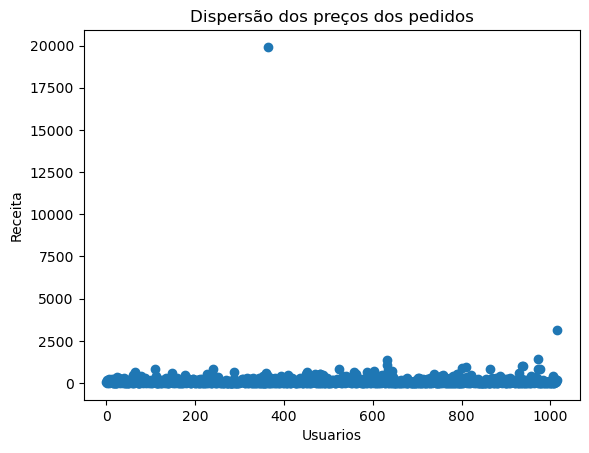

In [59]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Dispersão dos preços dos pedidos')
plt.xlabel('Usuarios')
plt.ylabel('Receita')
plt.show()

Com o gráfico de dispersão, pudemos verificar que o preço dos pedidos não ultrapassa a receita de 2500. No entanto, observamos um pedido com uma receita significativamente alta, indicando a presença de valores atípicos. Acreditamos que essas anomalias podem estar influenciando os resultados da análise.

[Voltar ao Indice](#back)

### 3.9. Percentis dos preços dos pedidos <a id='percentilpreco'></a>

Acreditando que há anomalias e que as mesmas atrapalham o resultado do nosso estudo iremos agora calcular percentis para o preço dos pedidos por usuário.

In [60]:
print(orders_users.sort_values(by='orders', ascending=False).head(10))
print(np.percentile(orders['revenue'], [95, 99]))

        user_id  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2
[414.275 830.3  ]


Calculando os percentins podemos concluir que menos de 5% dos usuários fizeram pedidos com um valor maiores que 414,27 e que menos de 1% dos usuários fizeram pedidos com um valor mais alto que 830.30. 

[Voltar ao Indice](#back)

### 3.10 Diferença na conversão entre os grupos usando dados brutos <a id='dadosbrutos1'></a>

Para termos a diferença na conversão entre os grupos usando dados brutos vamos calcular sua significância estatística e para isso criaremos variáveis para cada grupo e armazenaremos as colunas 'user_id', 'orders. 

Declararemos variáveis para ambos os grupos com com usuários que realizaram pedidos e também com a quantidade de pedidos correspondente. Definiremos 0 para usuários sem pedidos

Depois calcularemos a significância estatística da diferença de conversão com base nos resultados obtidos e aplicaremos o teste Mann-Whitney.

In [61]:
orders_a = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
orders_a.columns = ['user_id', 'orders']
orders_a.head()

,user_id,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


In [62]:
orders_b = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
orders_b.columns = ['user_id', 'orders'] 
orders_b.head()

,user_id,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1


In [63]:
sample_a = pd.concat(
    [
        orders_a['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits[visits['group'] == 'A']['visits'].sum()
                - len(orders_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [64]:
sample_b = pd.concat(
    [
        orders_b['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits[visits['group'] == 'B']['visits'].sum()
                - len(orders_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [65]:
print('{0:.5f}'.format(stats.mannwhitneyu(sample_a, sample_b)[1]))
print('{0:.3f}'.format(sample_b.mean() / sample_a.mean() - 1))

0.01102
0.160


Verificamos que o valor-p foi 0.01102, que é menor que 0.05. Portanto, há uma diferença significativa entre as duas amostras, e assim rejeitamos a hipótese nula de que as amostras são iguais. Além disso, observamos que a amostra B teve um ganho de 16% em relação à amostra A.

[Voltar ao Indice](#back)

### 3.11. Diferença no tamanho médio do pedido entre os grupos usando os dados brutos  <a id='dadosbrutos2'></a>

Para termos a diferença no tamanho médio do pedido entre os grupos usando os dados brutos calcularemos agora a significância estatística.

Iremos imprimir o valor-p para comparar os volumes médios de pedidos dos grupos e também imprimiremos o ganho relativo para o grupo B, arredondando o valor mais uma vez para três casas decimais.

In [66]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.862
0.278


Sobre a diferença no tamanho médio do pedido entre os grupos usando os dados brutos, observamos que o valor-p foi maior que 0.05. Logo, não temos evidências suficientes para rejeitar a hipótese nula de que as médias são iguais. Em sendo assim, concluímos que não há diferenças significativas entre as médias das amostras. Por fim, verificamos que a diferença relativa foi de 27.8%.

[Voltar ao Indice](#back)

### 3.12.  Diferença na conversão entre os grupos usando os dados filtrados <a id='dadosfiltrados1'></a>

Iremos agora encontrar a significância estatística da diferença na conversão entre os grupos usando os dados filtrados. Porém, antes, precisaremos filtrar os dados.

Para a filtragem, observaremos os valores dados nos percentis calculados acima, onde o percentil para o volume médio de pedido foi e para a quantidade de usuários foi, e assim consideraremos como usuários anômalos aqueles que realizaram três ou mais pedidos ou que fizeram um com valor superior a 414,27.

Para remover os usuários anômalos, iremos identificar os pedidos anômalos e depois adicionaremos os usuários que realizaram esses pedidos à lista de anomalias.

Para isso, iremos fatiar os dados para usuários com três ou mais pedidos e usuários com pedidos com valores superiores a 414,27. Por fim, juntaremos os dados em uma nova tabela e iremos também remover os valores duplicados.

Com a nova tabela, iremos remover os usuários anômalos e calcular a significância estatística da diferença de conversão, criando variáveis para o grupo A e B para armazenar os dados após as anomalias terem sido removidas pela filtragem.

Terminaremos imprimindo o valor-p para comparar as taxas de conversão dos grupos filtrados e o ganho relativo do grupo B.

In [67]:
more_orders = pd.concat([orders_a[orders_a['orders'] > 2]['user_id'], orders_b[orders_b['orders'] > 2]['user_id']], axis = 0)
expensive_orders = orders[orders['revenue'] > 414.27]['visitor_id']
anomalias = pd.concat([more_orders, expensive_orders], axis = 0).drop_duplicates().sort_values()
print(anomalias.head(5))
print(anomalias.shape)

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
dtype: int64
(58,)


Já verificamos aqui que temos 58 usuários anômalos.

Neste teste, analisaremos as seguintes hipóteses:

Hipótese nula: Não há diferença significativa entre as médias das duas amostras.

Hipótese alternativa: Existe diferença significativa entre as médias das duas amostras.

In [68]:
sample_a_filtered = pd.concat(
    [orders_a[np.logical_not(orders_a['user_id'].isin(anomalias))]
     ['orders'],pd.Series(0, 
         index=np.arange(
             visits[visits['group']=='A']['visits'].sum() 
             - len(orders_a['orders'])),name='orders')],axis=0)

In [69]:
sample_b_filtered  = pd.concat(
    [orders_b[np.logical_not(orders_b['user_id'].isin(anomalias))]
     ['orders'],pd.Series(0,
        index=np.arange(
            visits[visits['group']=='B']['visits'].sum() 
            - len(orders_b['orders'])),name='orders')],axis=0)

In [70]:
print("{0:.5f}".format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
print("{0:.3f}".format(sample_b_filtered.mean()/sample_a_filtered.mean()-1)) 

0.01235
0.182


Filtramos os dados para que pudéssemos encontrar a diferença na conversão entre os grupos sem os dados anômalos e concluímos que o valor-p foi menor que 0.05. Assim, com a diferença estatística significativa, rejeitamos a hipótese nula. Portanto, há diferença na média entre as duas amostras. Com os dados filtrados, as amostras ficaram mais homogêneas e a variância diminuiu.

[Voltar ao Indice](#back)

### 3.13 Diferença no tamanho médio do pedido entre os grupos usando os dados filtrados <a id='dadosfiltrados2'></a>

Usando a nova tabela com os dados filtrados, iremos agora encontrar a significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados filtrados.

Para isso, primeiramente iremos remover as anomalias e depois imprimiremos o valor-p para comparar os volumes médios e arredonde-o para três casas decimais.

Já nesse teste iremos analisar as seguintes hipóteses:

Hipótese nula: Não há diferença significativa entre o tamanho médio do pedido nas duas amostras.

Hipótese alternativa: Existe diferença significativa entre o tamanho médio do pedido nas duas amostras.

In [71]:
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(anomalias)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(anomalias)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(anomalias)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(anomalias)))]['revenue'].mean() - 1))

0.680
-0.047


Já quanto à diferença no tamanho médio do pedido entre os grupos usando os dados filtrados, concluímos que o valor-p foi de 0,68, ou seja, superior a 0,05, e assim sendo, não há diferença significativa na receita média entre os grupos A e B. Também observamos que a receita média do grupo B perdeu 4,7% em relação à receita do grupo A.

[Voltar ao Indice](#back)

### 3.14. Decisão sobre o teste  <a id='decisao'></a>

Com alguns testes realizados e observando seus resultados, entendemos que já podemos tomar uma decisão. Sabemos também que as possíveis decisões seriam: parar o teste e considerar um dos grupos o líder; parar o teste e concluir que não há diferença entre os grupos; continuar o teste.

E assim, decidimos primeiramente parar o teste, ou seja, não iremos continuar testando mais os grupos A e B, pois já encontramos um resultado satisfatório para o estudo.

Com a referida decisão e observando o teste como um todo, ficou claro e evidente que há diferença entre os grupos, e assim consideramos o grupo B líder, tendo em vista que houve uma grande diferença na significância estatística da diferença no tamanho médio do pedido em dados brutos e filtrados, e também na significância da conversão entre os grupos.

[Voltar ao Indice](#back)

# 4. CONCLUSÃO  <a id='conclusao'></a>

Com o presente estudo, pudemos concluir primeiramente sobre a priorização da hipótese que a melhor escolha seria usar o modelo RICE em vez do modelo ICE, tendo em vista que estamos priorizando hipóteses que mudam para refletir o potencial em um público maior, em vez de avaliarmos apenas o impacto, confiança e facilidade.

Já quanto ao teste A/B, concluímos o seguinte:

- sobre a receita acumulada e tamanho médio acumulado do pedido por grupo: o grupo B foi o vencedor, porém foi encontrado um pico que sugeriu de dados atípicos que afetariam o resultado final


- quando verificamos a diferença relativa no tamanho médio acumulado do pedido entre os grupos, identificamos que poderia haver a existência de valores atípicos.


- quanto a taxa de conversão o grupo B teve uma taxa maior e quando checamos a diferença relativa o mesmo liderou. 


- quanto da dispersão do número de pedidos por usuário e dos preços dos pedidos identificamos que de fato havia valores anômalos e calculamos os percentis e verificamos que: 
    - 5% dos usuários fizeram mais que 2 pedidos e 1% fizeram mais que 4 pedidos.
    - 5% dos usuários fizeram pedidos com um valor maiores que 414,27 e que 1% fizeram pedidos com um valor mais alto que 900.90


- Verificamos que existe uma grande diferença na significância estatística da diferença no tamanho médio do pedido em dados brutos e filtrados, e também há diferença na significância da conversão entre os grupos.


- e com base no valor-p e na variância podemos concluir que: 
    - om os dados filtrados, temos uma diferença estatística significativa no tamanho médio do pedido, pois o valor-p está abaixo de 0.05, ou seja, podemos rejeitar a hipótese nula. Portanto, há diferença na média entre as duas amostras. Com as amostras mais homogêneas, a taxa de variância continua a ser alta.
    - com relação à significância da conversão entre os grupos, verificamos que o valor-p foi maior que 0.05 e, portanto, não há diferença significativa na taxa de conversão entre os grupos A e B. Quanto à variação, encontramos um valor de 4.7%.

Por fim, com os resultados encontrados no teste A/B, decidimos parar o teste. Pela evidente diferença entre os grupos, concluímos que o grupo B seria o líder, tendo em vista a grande diferença na significância estatística da diferença no tamanho médio do pedido em dados brutos e filtrados, assim como na significância da conversão entre os grupos.
    


[Voltar ao Indice](#back)